# SESI 8 - ADVANCED VISUALIZATION

## Syaima Radestya
PYTN-KS-010

In [128]:
! pip install wordcloud

In [129]:
# import
from wordcloud import WordCloud, STOPWORDS

In [130]:
# Open File
alice_novel = open('alice_novel.txt', 'r').read()

In [131]:
stopwords = (STOPWORDS)

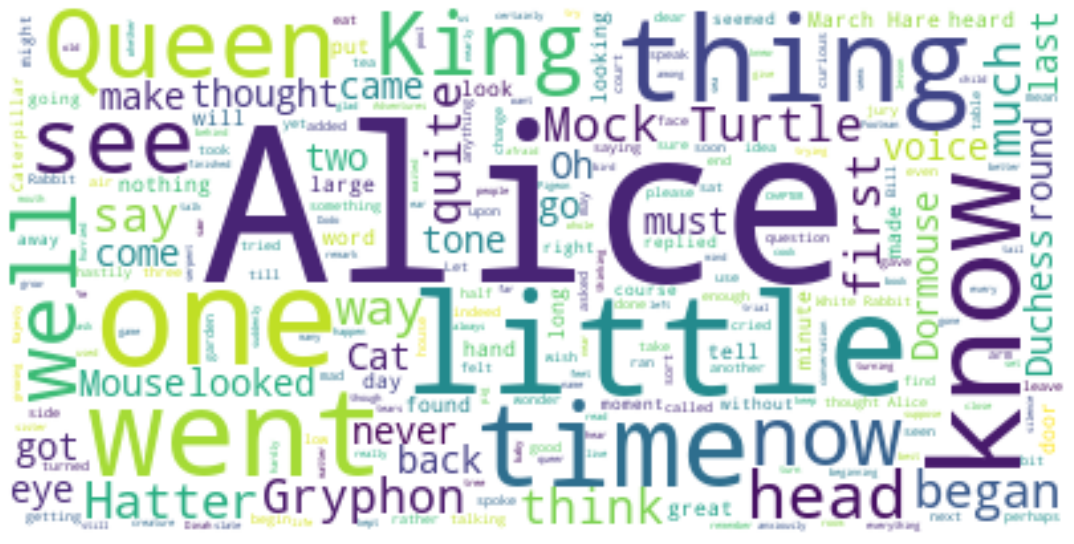

In [132]:
stopwords.add('said')
# inisiasi wordclouud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# Tampilkan wordcloud
alice_wc.generate(alice_novel)

import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figwidth(19)
fig.set_figheight(21)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

In [133]:
# masking
import numpy as np
from PIL import Image

alice_mask = np.array(Image.open("alice_mask.png"))

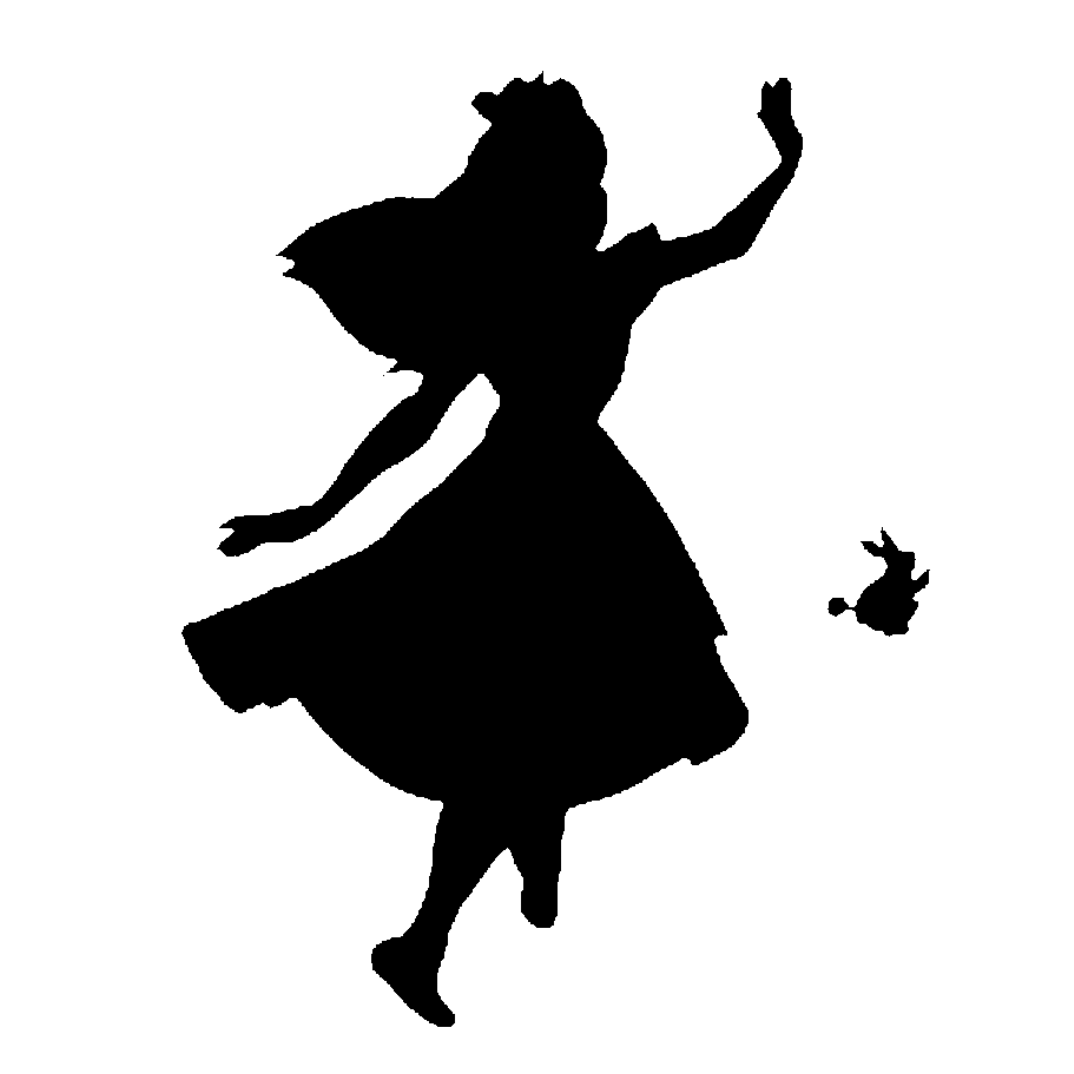

In [134]:
# metode fig
fig = plt.figure()
fig.set_figwidth(19)
fig.set_figheight(21)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

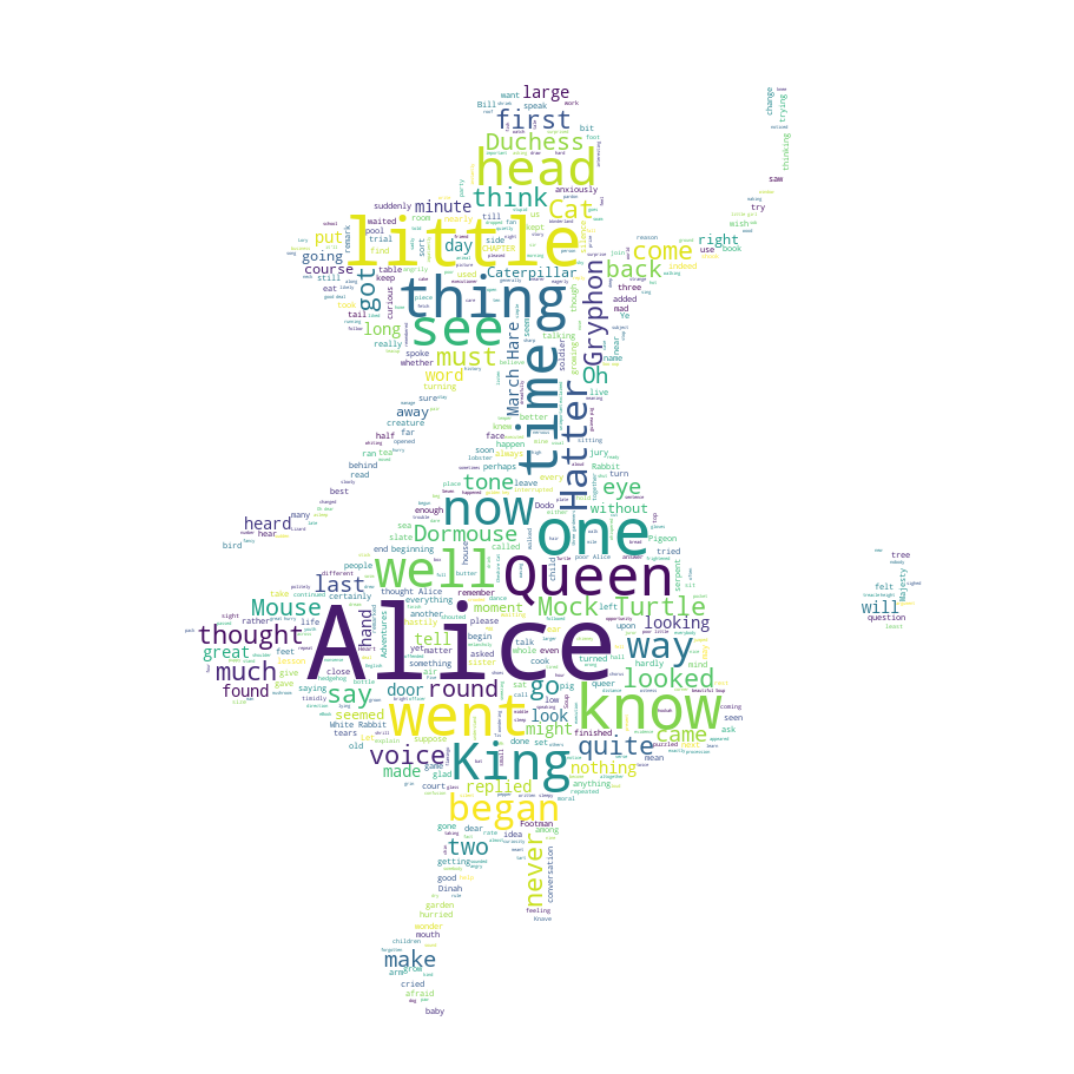

In [135]:
# inisiasi wordclouud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=alice_mask
)

# generate wordcloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(19)
fig.set_figheight(21)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

## Regression Plot

In [136]:
# import seaborn
import seaborn as sns

In [137]:
# import pandas and open file
df_can = pd.read_excel("Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [138]:
# bersihkan data
# hapus kolom yang tidak diperlukan
kol = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df_can.drop(kol, axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [139]:
# Ubah Nama
df_can.rename(columns={'OdName':'Country',
                       'AreaName':'Continent',
                       'RegName':'Region'}, inplace=True)

In [140]:
df_can['Total'] = df_can.sum(axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_6424\552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [141]:
years = np.arange(1980, 2014)
df_total = pd.DataFrame(df_can[years].sum())
df_total.index = map(float, df_total.index)
df_total.reset_index(inplace=True)
df_total.columns = ['years', 'total']
df_total.head()

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


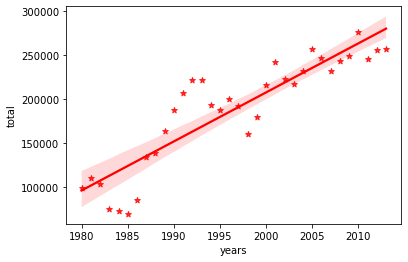

In [142]:
sns.regplot(x='years', y='total', data=df_total, color='red', marker='*');

## Pengenalan Folium

In [143]:
import folium
world_map = folium.Map()

world_map

In [144]:
world_map = folium.Map(location=[-6.194986754268891, 106.82303793320305], zoom_start=25)

world_map

In [145]:
url = "https://github.com/ardhiraka/PFDS_sources/raw/master/Police_Department_Incidents_-_Previous_Year__2016_.csv"
df_incidents = pd.read_csv(url)
df_incidents.head()


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [146]:
limit = 100
df_incidents = df_incidents.iloc[:limit, :]
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [147]:
df_incidents.shape

(100, 13)

In [148]:
Latitude = 37.773972
Longitude = -122.431297

In [149]:
# generate San Fransisco

sanfran_map = folium.Map(location=[Latitude, Longitude], zoom_start=12)

sanfran_map


In [150]:
# Inisiasi fitur grup
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker([lat, lng],
                           radius=5,
                           color='yellow',
                           fill=True,
                           fill_color='blue',
                           fill_opacity=0.6,)
    )
        
sanfran_map.add_child(incidents)

In [151]:
# Inisiasi fitur grup
incidents = folium.map.FeatureGroup()

# looping ke dataset untuk long dan lat nya
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker([lat, lng],
                           radius=5,
                           color='blue',
                           fill=True,
                           fill_color='yellow',
                           fill_opacity=0.6,)
    )
        
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Descript)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)
    
sanfran_map.add_child(incidents)

In [153]:
sanfran_map = folium.Map(location=[Latitude, Longitude], zoom_start=12)

for lat, lng,label in zip(df_incidents.Y, df_incidents.X, df_incidents.Descript):
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6,
    ).add_to(sanfran_map)

sanfran_map

In [154]:
from folium import plugins

sanfran_map = folium.Map(location=[Latitude, Longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng,label in zip(df_incidents.Y, df_incidents.X, df_incidents.Descript):
    folium.CircleMarker(
            [lat, lng],
            popup=label,
            icon=None
    ).add_to(incidents)

sanfran_map